<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/Clasificaci%C3%B3n_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os
import pandas as pd
import kagglehub

##1. Lectura del conjunto de datos

In [2]:
path = kagglehub.dataset_download("jedhelmers/disaster-tweets")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/jedhelmers/disaster-tweets/versions/1


In [3]:
train_path = os.path.join(path, 'resources', 'train.csv')
test_path = os.path.join(path, 'resources', 'test.csv')

X_train = pd.read_csv(train_path)
X_test = pd.read_csv(test_path)

In [4]:
X_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
X_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


##2. Visualización del conjunto de datos

In [7]:
 print('Tamaño del conjunto de datos de entrenamiento: ', len(X_train))
 print('Tamaño del conjunto de datos de pruebas: ', len(X_test))

Tamaño del conjunto de datos de entrenamiento:  7613
Tamaño del conjunto de datos de pruebas:  3263


In [9]:
# Tweets de cada tipo que se encuentran en el conjunto de datos de entrenamiento
X_train['target'].value_counts()

,count
target,
0,4342
1,3271


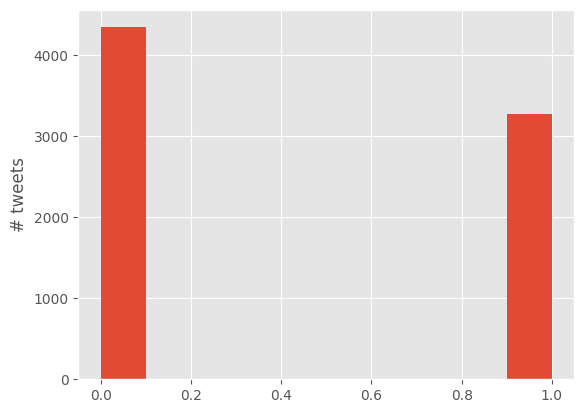

In [10]:
X_train['target'].hist()
plt.ylabel('# tweets')
plt.show()

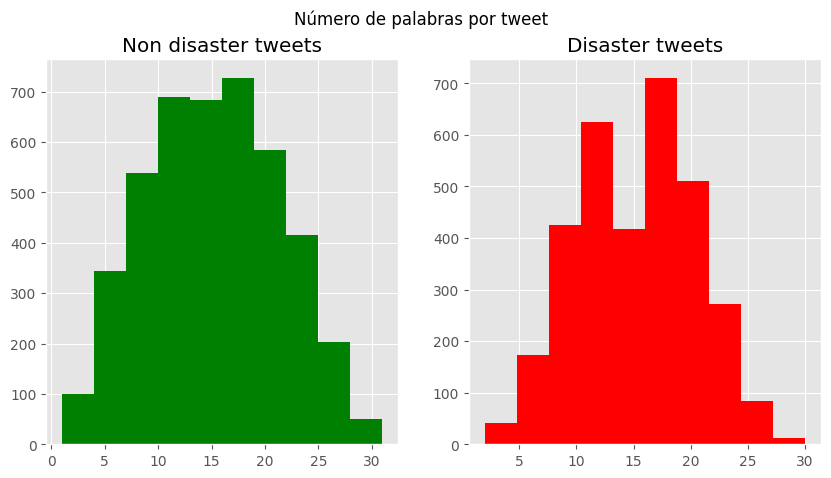

In [13]:
# Número de palabras por Tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Calculamos el número de palabras por tweet
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Número de palabras por tweet')

plt.show()

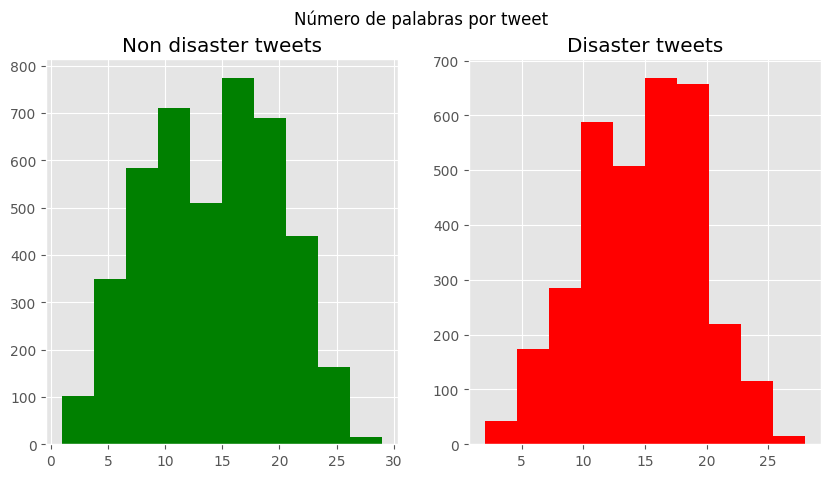

In [14]:
# Número de palabras únicas por tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Calculamos el número de palabras
tween_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tween_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Número de palabras por tweet')

plt.show()